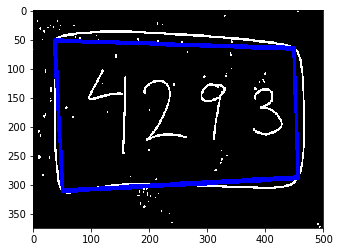

In [35]:
%config IPCompleter.greedy=True

import cv2 as cv
import src.helpers as helpers
from sklearn.externals import joblib
import matplotlib.pyplot as plt

RESIZED_IMAGE_WIDTH = 500
image = cv.imread('images/4293-border.jpg')
height, width, channels = image.shape
resize_factor = RESIZED_IMAGE_WIDTH/width

threshold = 100
max_threshold = 200

image = cv.resize(image, (0, 0), fx=resize_factor, fy=resize_factor, interpolation=cv.INTER_AREA)
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
blurred_image = cv.GaussianBlur(gray_image, (5, 5), 0)
threshold_image = cv.adaptiveThreshold(blurred_image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                                             cv.THRESH_BINARY_INV,11,2)
threshold_image = cv.dilate(threshold_image, (5, 5))

# plt.imshow(threshold_image)
# plt.imshow(edged)
# cv.imshow('edged', edged)

image, contours, hier = cv.findContours(threshold_image, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
image = cv.cvtColor(image, cv.COLOR_GRAY2BGR)


for contour in contours:
    epsilon = 0.02 * cv.arcLength(contour, True)
    approx = cv.approxPolyDP(contour, epsilon, True)
    if len(approx) == 4 and abs(cv.contourArea(approx)) > 200 and cv.isContourConvex(approx):
#         print(approx)
        color = (0, 0, 255)
        thickness = 3
        cv.drawContours(image, [approx], 0, color, thickness)
        plt.imshow(image)
